In [1]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import POD
import importlib
importlib.reload(POD)

import data_analysis
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18

# Simulation competition btw RB and HC

$ \Lambda = 0.01$, $\Gamma = 8$ and $R_a = 10^8$

In [2]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()


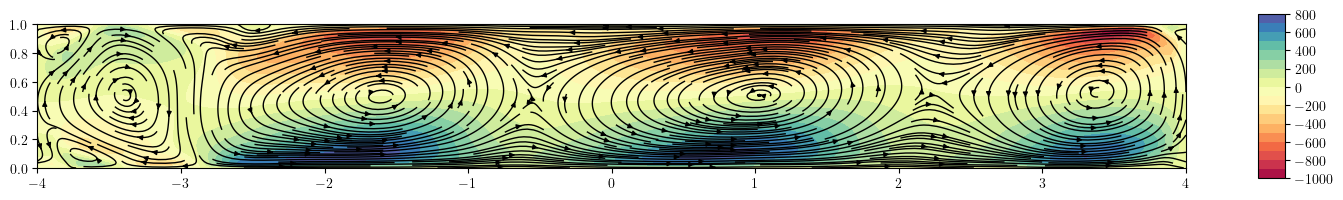

In [3]:
simulation.plot_meanfield()

# 2D Example
for rundown on POD

In [21]:
from POD import POD

u1 = u[:, 40, 25]
u2 = u[:, 43, 25]

U = np.vstack((u1, u2))

modes, eigvals, eigvecs, proj_coef, KE_mode = POD(U, 1, 2, 2)

print(np.shape(modes))

i = 30

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(time[::i], u2[::i], color='navy', label= r"$u'_2$")
ax.plot(time[::i], u1[::i], color='orange', label= r"$u'_1$")

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$t$", fontsize=fontsize)
ax.set_ylabel(r"$u'$", fontsize=fontsize)
# ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()

(2, 2)


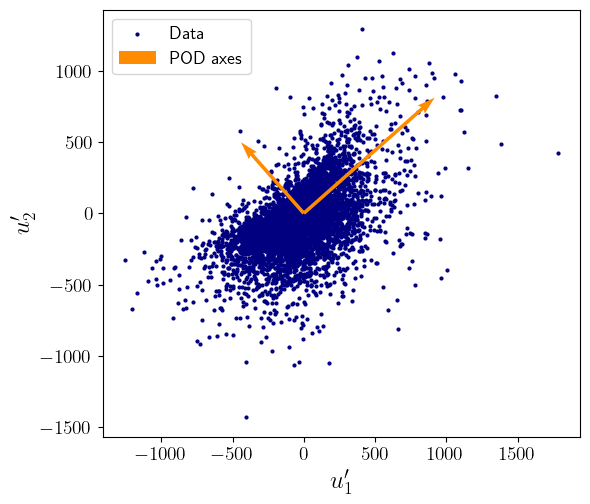

In [32]:
scaling_factor = 0.05 * np.sqrt(eigvals[:2])

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(u1, u2, color='navy', s=4, label="Data")

# Plot POD axes
i=0
ax.quiver(0, 0, modes[0, i] * scaling_factor[i], modes[1, i] * scaling_factor[i],
              angles='xy', scale_units='xy', scale=1, color='darkorange', label=r"POD axes")

i=1
ax.quiver(0, 0, modes[0, i] * scaling_factor[i], modes[1, i] * scaling_factor[i],
              angles='xy', scale_units='xy', scale=1, color='darkorange')

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$u'_1$", fontsize=fontsize)
ax.set_ylabel(r"$u'_2$", fontsize=fontsize)
ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()
# plt.show()
# plt.savefig('../results/POD/example', dpi=300)

# Exploration

In [7]:

umean = np.mean(u, axis=0)

h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))


# print(np.shape(x))
# print(np.shape(x), np.shape(time))
# U = np.reshape(u, (6249, 81*51))
# print(np.shape(U))
# print(np.array_equal(np.reshape(U, (6249,81,51)), u))

# Compute POD
num_modes = 100
POD = mr.compute_POD_arrays_snaps_method(np.swapaxes(U,0,1), list(mr.range(num_modes)), atol = 0)
modes = POD.modes
eigvals = POD.eigvals

print(np.shape(modes))
print(np.shape(eigvals))
print(h*l)
KE_mode = []
for i in range(20):
    TKE = np.sum(eigvals)
    KE_mode.append(eigvals[i]/TKE)

POD_modes = []
[POD_modes.append([]) for i in range(num_modes)]
for i in range(num_modes):
  POD_modes[i] = modes[:,i]
  POD_modes[i] = POD_modes[i].reshape((h,l)) 

(4131, 100)
(3951,)
4131


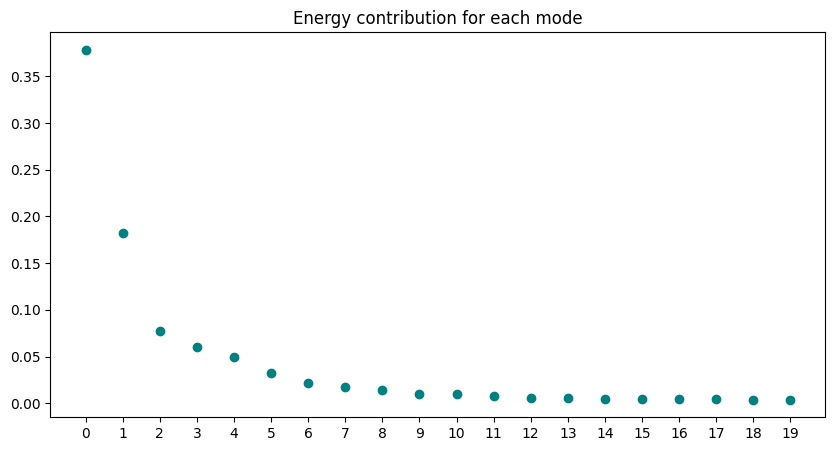

In [8]:
%matplotlib inline
N = np.arange(0, len(KE_mode), step = 1)
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(N, KE_mode, c = 'teal')
ax.set_xticks(N)
ax.set_title(f'Energy contribution for each mode')
plt.show()

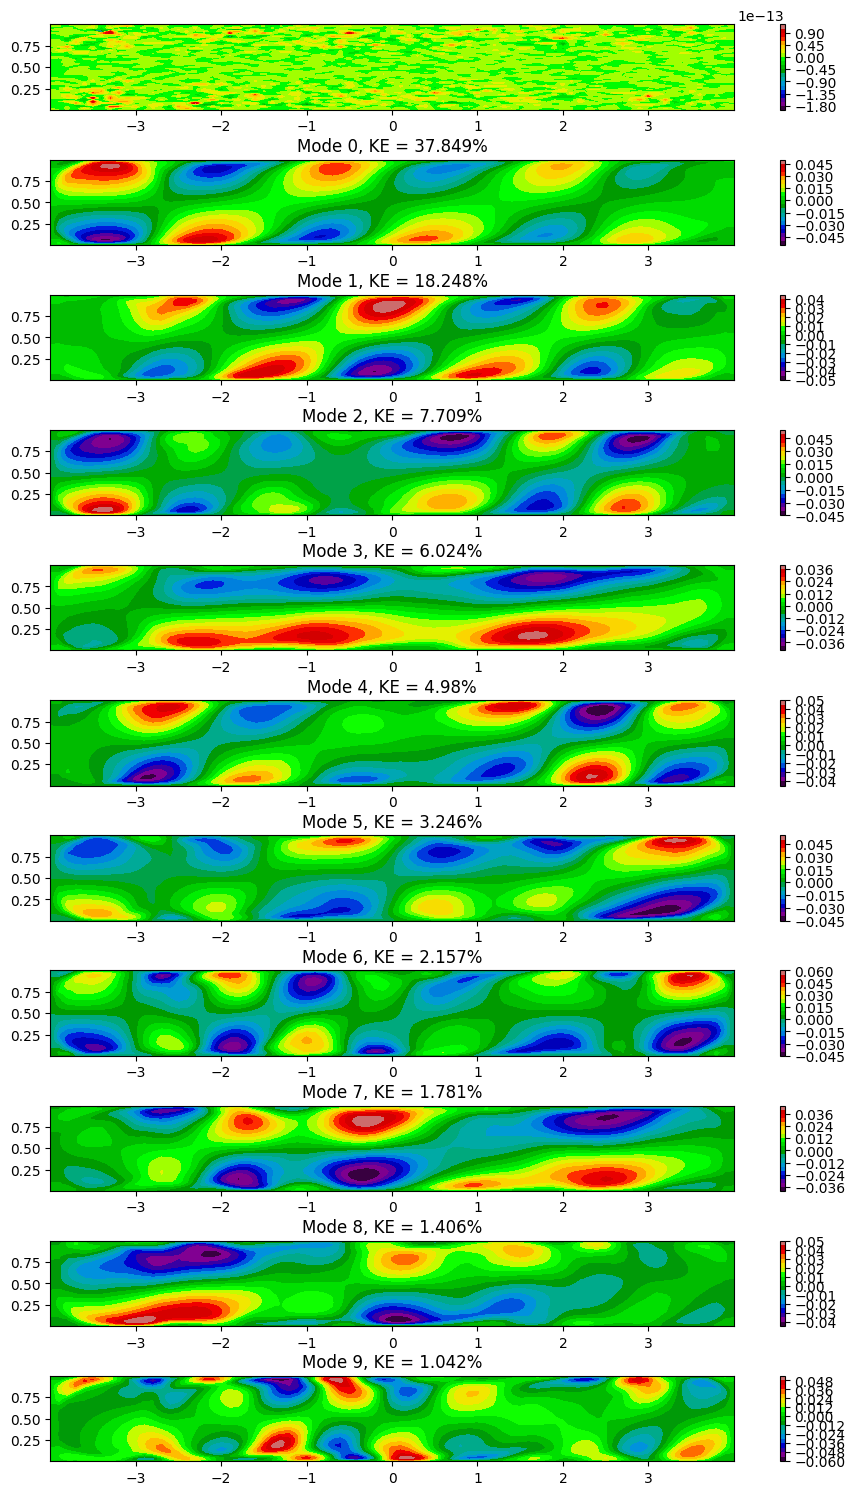

In [9]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes.png',dpi=300)
# plt.close()

In [10]:
from POD import POD
wmean = np.mean(w, axis=0)
w = w - wmean

h, l = np.shape(x)
m = len(time)

# reshape
W = np.reshape(w, (m, h * l))

POD_modes_w , KE_mode_w, modes_w, eigvals_w, proj_coef_w = POD(W, h, l, 100)
POD_modes_u , KE_mode_u, modes_u, eigvals_u, proj_coef_u = POD(U, h, l, 100)


In [11]:
print(np.shape(POD_modes_u))

(100, 81, 51)


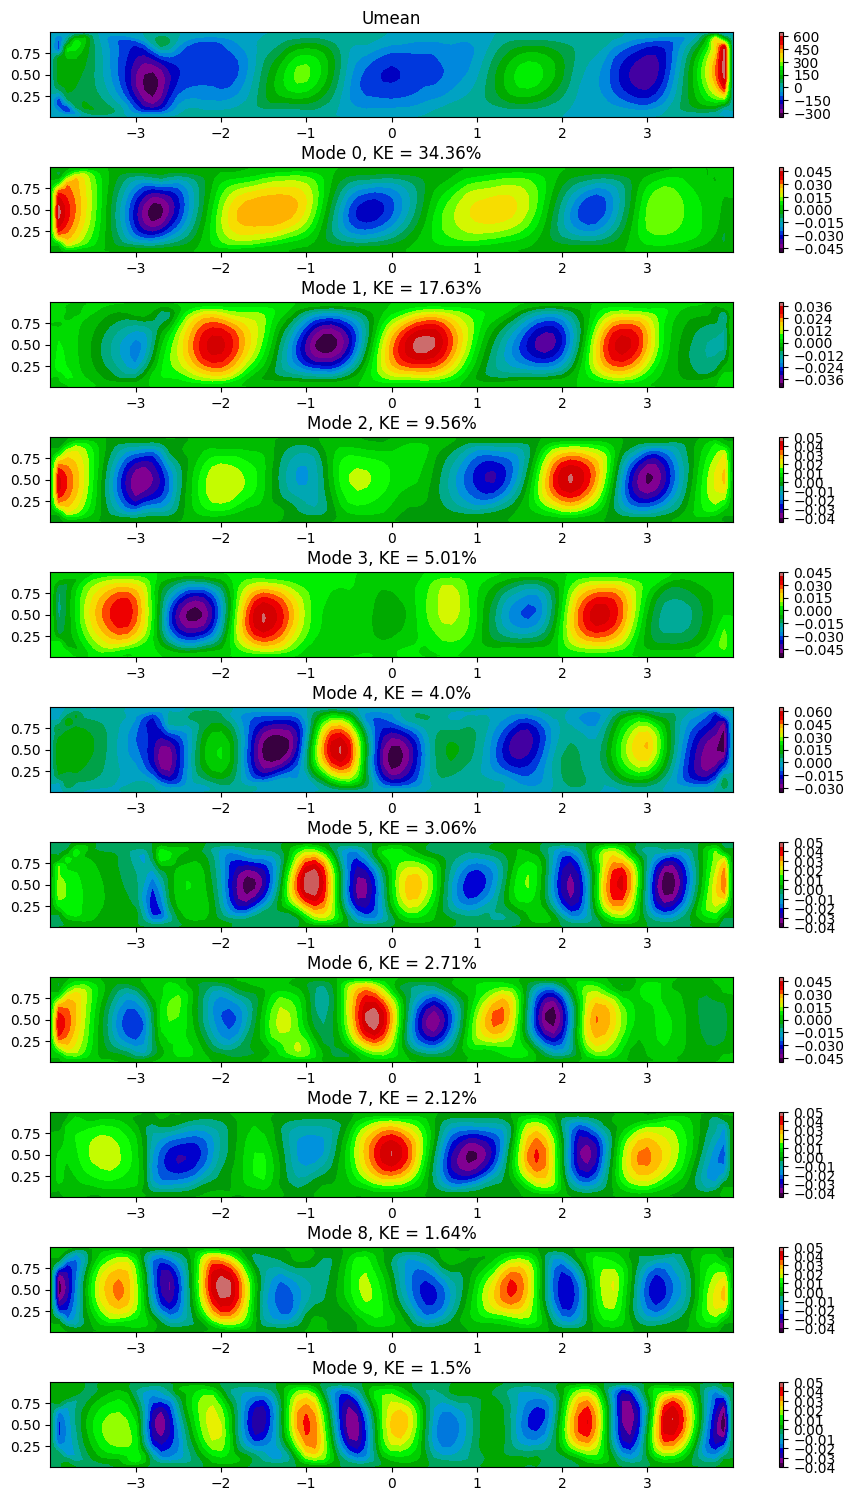

In [12]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
ax[0].set_title('Umean')

for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes_w[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode_w[j], 2)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

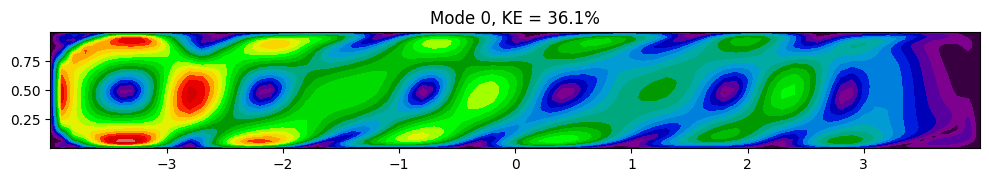

In [13]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

In [18]:
print(np.shape(u))
print(81*51)

(6249, 81, 51)
4131


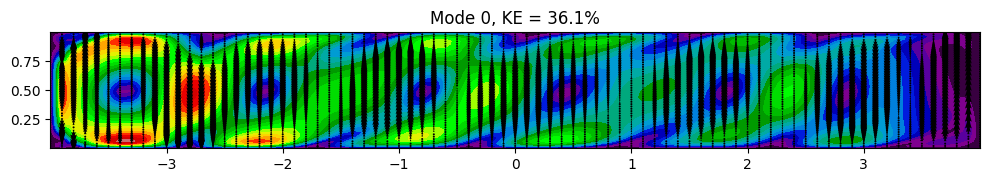

In [21]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.quiver(x, z, umean, wmean)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

# Clean POD

### POD on velocity components

In [178]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()


h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))

w = w - wmean
W = np.reshape(w, (m, h * l))

UW = np.concatenate([U, W], axis = 1)

In [5]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

num_modes = 200
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W, h, l, num_modes)
modes_uw, eigvals_uw, eigvecs_uw, proj_coef_uw = POD(UW, h, l, 2*num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)
KE_modes_uw = KE_modes(eigvals_uw, num_modes)

##### Separating the components

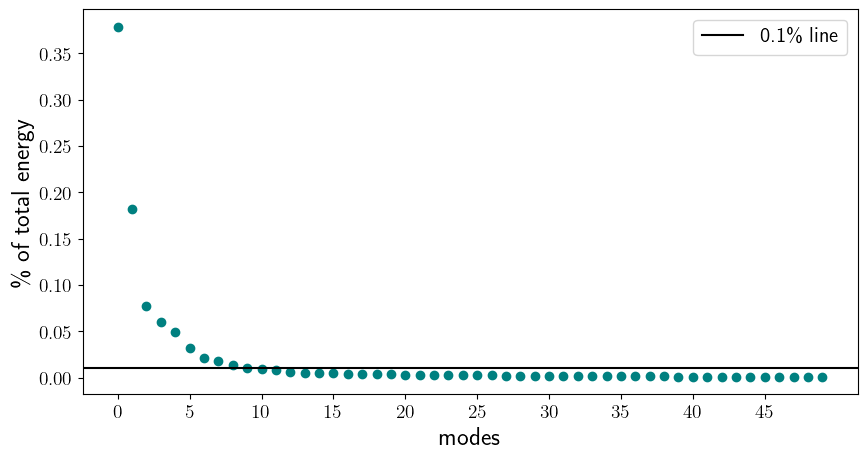

In [28]:
j = 50
from POD import plot_energy_contribution

plot_energy_contribution(KE_modes_u, j, fontsize)
# plt.savefig('../results/POD/energy_contribution', dpi=300)

In [19]:
print(np.shape(modes_u))
POD_modes_u = np.reshape(modes_u, (81,51,num_modes))
POD_modes_w = np.reshape(modes_w, (81,51,num_modes))
POD_modes_uw = np.reshape(modes_uw, (2*h*l,2*num_modes))

(4131, 500)


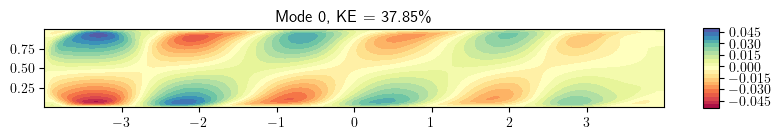

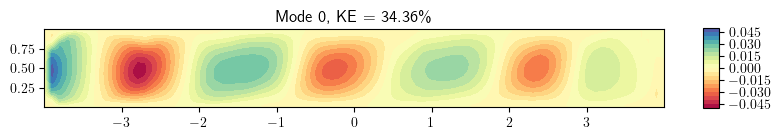

In [32]:
j = 0

from POD import plot_map_mode
plot_map_mode(POD_modes_u, KE_modes_u, j, x, z)
plot_map_mode(POD_modes_w, KE_modes_w, j, x, z)

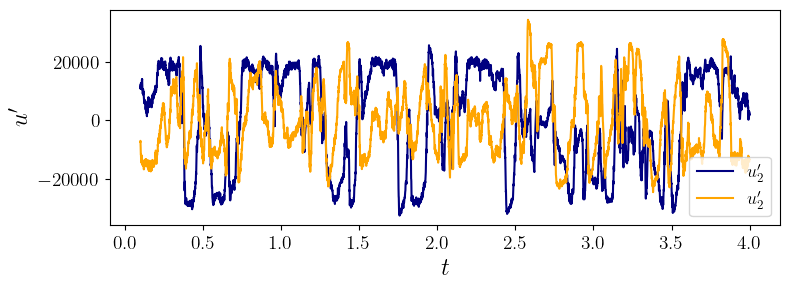

In [40]:
i = 1
num_mode = 0
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(time[::i], proj_coef_w[num_mode, ::i], color='navy', label= r"$u'_2$")
ax.plot(time[::i], proj_coef_w[1, ::i], color='orange', label= r"$u'_2$")

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$t$", fontsize=fontsize)
ax.set_ylabel(r"$u'$", fontsize=fontsize)
# ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()

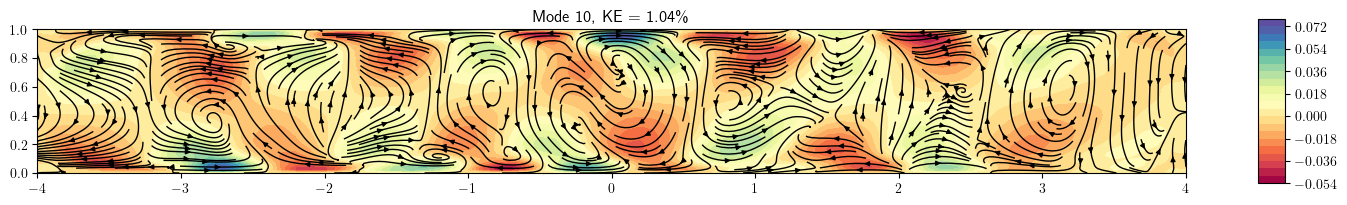

In [35]:
j= 10

from POD import streamplot_mode
streamplot_mode(POD_modes_u, POD_modes_w, POD_modes_u, KE_modes_all, j, x, z)

plt.tight_layout()
# plt.savefig(f'../results/POD/pod_mode_{j}.png',dpi=300, bbox_inches='tight')
plt.show()

#### On stacked arrays

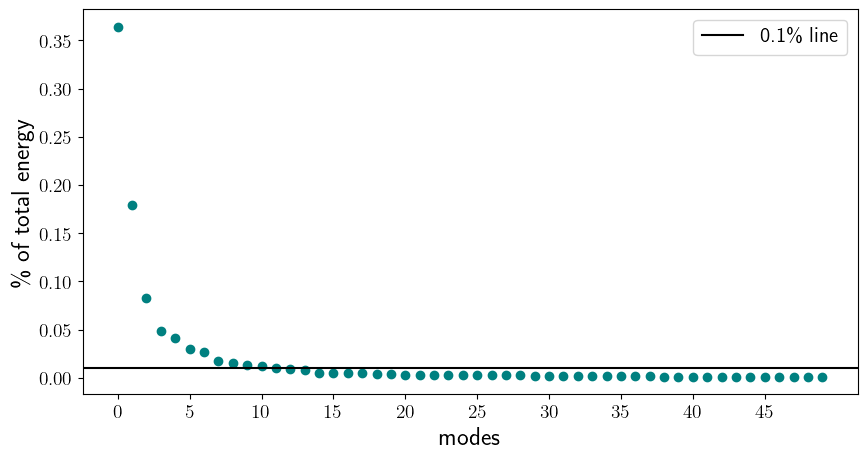

In [9]:
j = 50
from POD import plot_energy_contribution

plot_energy_contribution(KE_modes_uw, j, fontsize)

In [10]:
POD_modes_uw = np.reshape(modes_uw, (2*h*l,2*num_modes))
print(np.shape(POD_modes_uw), np.shape(modes_uw))

(8262, 1000) (8262, 1000)


In [11]:
np.shape(UW)

(6249, 8262)

In [20]:
PODu = np.reshape(POD_modes_uw[:h*l,:], (h,l, 2*num_modes))
PODw = np.reshape(POD_modes_uw[h*l:,:], (h,l, 2*num_modes))

In [31]:
j = 0
np.isclose(PODu[:,:,j], POD_modes_u[:,:,j])

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

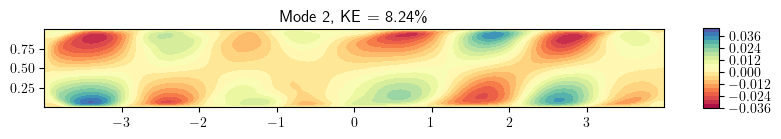

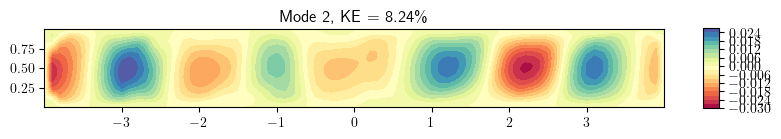

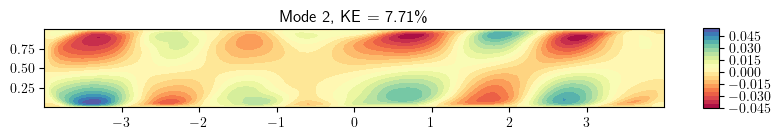

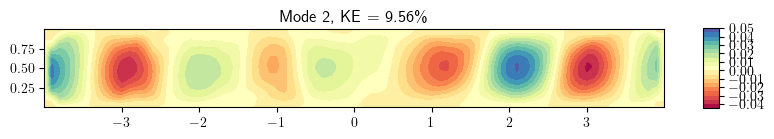

In [27]:
j = 2
from POD import plot_map_mode
plot_map_mode(PODu, KE_modes_uw, j, x, z)
plot_map_mode(PODw, KE_modes_uw, j, x, z)

plot_map_mode(POD_modes_u, KE_modes_u, j, x, z)
plot_map_mode(POD_modes_w, KE_modes_w, j, x, z)

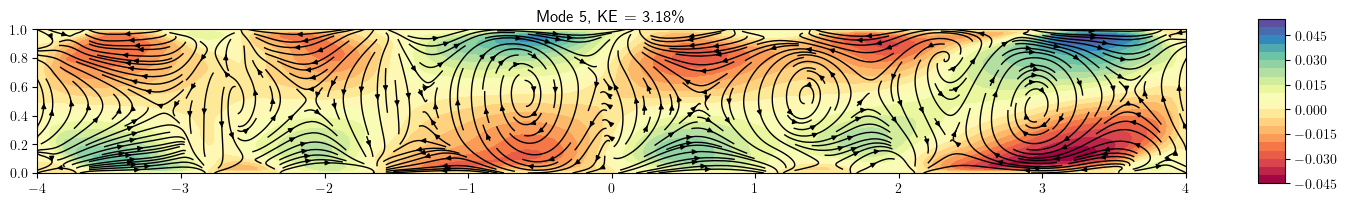

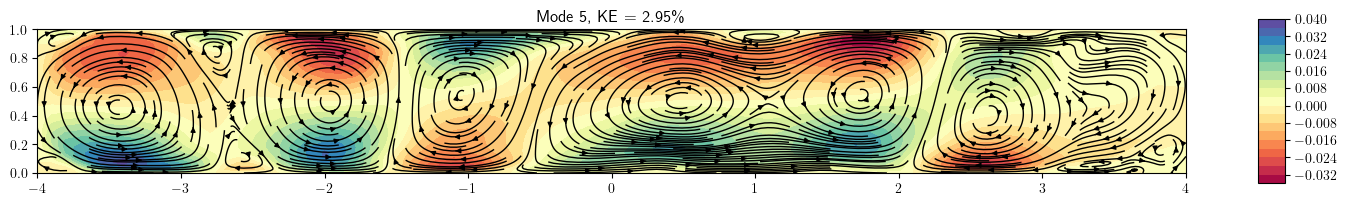

In [37]:
j= 5

from POD import streamplot_mode
streamplot_mode(POD_modes_u, POD_modes_w, POD_modes_u, KE_modes_all, j, x, z)

plt.tight_layout()

streamplot_mode(PODu, PODw, PODu, KE_modes_uw, j, x, z)

plt.tight_layout()
plt.show()

### Reconstruction

In [40]:
from POD import residual_norm, reconstruct_data

num_modes = 200
residuals_u = np.zeros(num_modes)
residuals_w = np.zeros(num_modes)
for i in range(1, num_modes + 1 ):
    reconstructed_data_u = reconstruct_data(proj_coef_u, modes_u, i)
    reconstructed_data_w = reconstruct_data(proj_coef_w, modes_w, i)
    r = residual_norm(U, reconstructed_data_u)
    residuals_u[i-1] = r
    r = residual_norm(W, reconstructed_data_w)
    residuals_w[i-1] = r

In [41]:
num_modes = 200
residuals_uw = np.zeros(num_modes)
for i in range(1, num_modes + 1 ):
    reconstructed_data = reconstruct_data(proj_coef_uw, modes_uw, i)
    r = residual_norm(UW, reconstructed_data)
    residuals_uw[i-1] = r

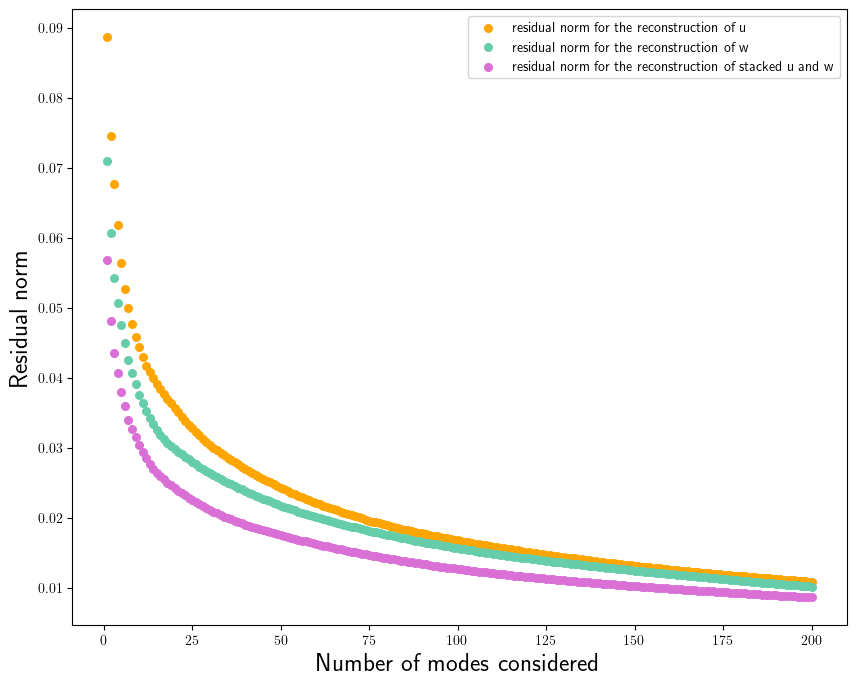

In [43]:
fig,ax = plt.subplots(figsize = (10, 8))

N_modes = np.arange(1, num_modes + 1, step = 1)

ax.scatter(N_modes, residuals_u, s = 30, c = 'orange', label = r"residual norm for the reconstruction of u")
ax.scatter(N_modes, residuals_w, s = 30, c = 'mediumaquamarine', label = r"residual norm for the reconstruction of w")
ax.scatter(N_modes, residuals_uw, s = 30, c = 'orchid', label = r"residual norm for the reconstruction of stacked u and w")

# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
ax.legend()
# fig.tight_layout()
plt.show()
# plt.savefig('../results/DMD/residual_norm.png',dpi=300)

# Reconstructed Simulation

In [3]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()


h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))

w = w - wmean
W = np.reshape(w, (m, h * l))

T = np.reshape(T, (m, h*l))

UW = np.concatenate([U, W], axis = 1)
UWT = np.concatenate([U, W, T], axis = 1)

In [4]:
from POD import POD
from POD import KE_modes

num_modes = 10
modes_uw, eigvals_uw, eigvecs_uw, proj_coef_uw = POD(UW, h, l, 2*num_modes)
modes_uwt, eigvals_uwt, eigvecs_uwt, proj_coef_uwt = POD(UWT, h, l, 3*num_modes)

KE_modes_uw = KE_modes(eigvals_uw, num_modes)

In [5]:
from POD import reconstruct_data
num_modes = 20
reconstructed_data_uw = reconstruct_data(proj_coef_uw, modes_uw, 20)
reconstructed_data_uwt = reconstruct_data(proj_coef_uwt, modes_uwt, 20)

In [7]:
print(np.shape(reconstructed_data_uwt))

(6249, 12393)


In [6]:
U_reconstructed = np.reshape(reconstructed_data_uwt[:,:h*l], (m,h,l))
W_reconstructed = np.reshape(reconstructed_data_uwt[:,h*l:2*h*l], (m,h,l))
T_reconstructed = np.reshape(reconstructed_data_uwt[:,2*h*l:], (m,h,l))
print(np.shape(U_reconstructed), np.shape(W_reconstructed), np.shape(T_reconstructed))

(6249, 81, 51) (6249, 81, 51) (6249, 81, 51)


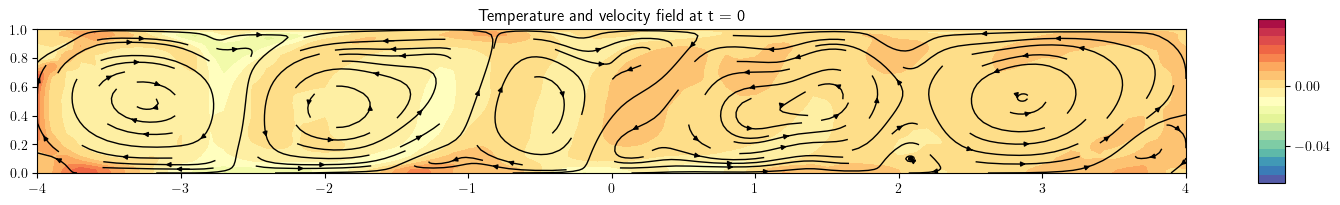

In [7]:
from data_analysis import Simulation
reconstructed_simulation = Simulation(current_directory)
reconstructed_simulation.reconstruct_simulation(U_reconstructed, W_reconstructed, T_reconstructed)

t = 0

reconstructed_simulation.plot_field(t)

## uz and KE

In [14]:
uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()
KE_reconstructed = reconstructed_simulation.KE()

In [15]:
print(np.shape(KE_reconstructed))
KE = simulation.KE()
print(np.shape(KE))
uz, uzmean = simulation.UZ()

(6249, 81, 51)
(6249, 81, 51)


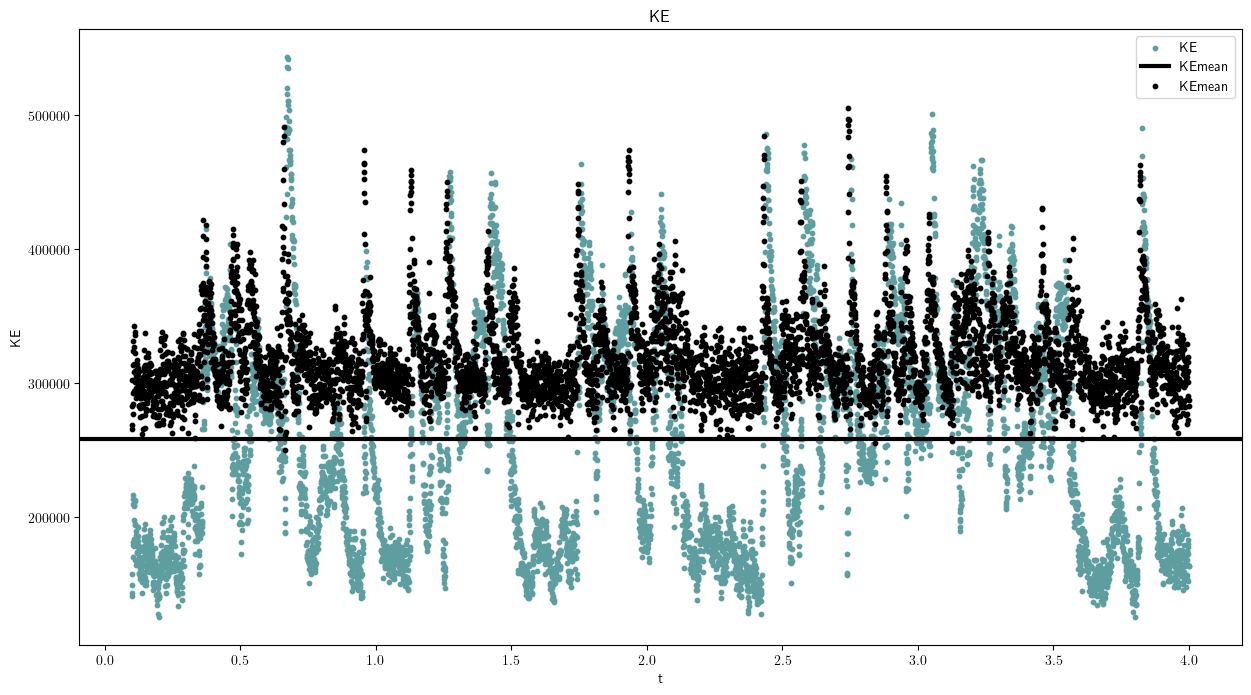

In [94]:
fig,ax = plt.subplots(figsize = (15, 8))

# max_indicesKE = find_peaks(KE_mean, distance=50, height=400000)[0]


ax.scatter(time, np.mean(KE_reconstructed, axis = (1,2)), s = 10, c = 'cadetblue', label = 'KE')

# ax.scatter([time[i] for i in max_indicesKE], [KE_mean[i] for i in max_indicesKE], color = 'orange', label = 'max in KE')
# ax.scatter([time[i] for i in min_indices], [KE_mean[i] for i in min_indices], color = 'k', label = 'min in uz')

ax.axhline(np.mean(KE_reconstructed), c = 'k', linewidth = 3, label = 'KEmean')
ax.scatter(time, np.mean(KE, axis = (1,2)), c = 'k', s = 10, label = 'KEmean')
ax.set_title('KE')
ax.set_ylabel('KE')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [99]:
np.shape(uz_reconstructed)

(6249,)

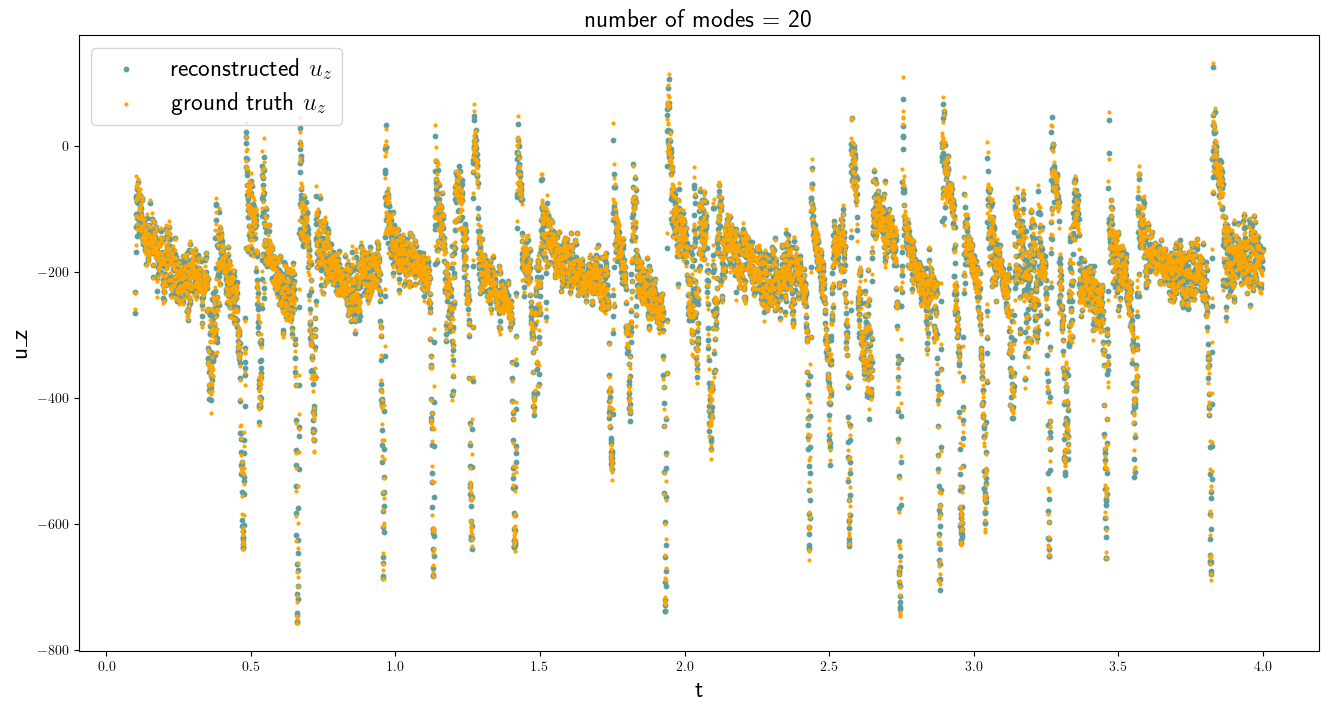

In [16]:
fig,ax = plt.subplots(figsize = (16, 8))

# max_indicesKE = find_peaks(KE_mean, distance=50, height=400000)[0]


ax.scatter(time, uz_reconstructed + uzmean, s = 10, c = 'cadetblue', label = r'reconstructed $u_z$')
ax.scatter(time, uz, s = 4, c = 'orange', label = r'ground truth $u_z$')

# ax.scatter([time[i] for i in max_indicesKE], [KE_mean[i] for i in max_indicesKE], color = 'orange', label = 'max in KE')
# ax.scatter([time[i] for i in min_indices], [KE_mean[i] for i in min_indices], color = 'k', label = 'min in uz')

# ax.axhline(np.mean(KE_reconstructed), c = 'k', linewidth = 3, label = 'KEmean')
ax.set_title(f'number of modes = {num_modes} ', fontsize = fontsize)
ax.set_ylabel(r'u_z', fontsize= fontsize)
ax.set_xlabel(r't', fontsize = fontsize)
ax.legend(fontsize = fontsize)
# fig.tight_layout()
plt.show()

## Analysis for different number of modes considered

In [9]:
from POD import residual_norm
num_modes = 20
residuals_uwt = np.zeros(num_modes)
for i in range(1, num_modes + 1 ):
    reconstructed_data = reconstruct_data(proj_coef_uwt, modes_uwt, i)
    r = residual_norm(UWT, reconstructed_data)
    residuals_uwt[i-1] = r

In [10]:
def plot_uz(time, uz_reconstructed, uz, uzmean, num_modes, nmax, residuals_uw):
    fig, [ax1,ax2] = plt.subplots(1,2,figsize = (16, 5), gridspec_kw={'width_ratios': [2, 1]})


    ax1.scatter(time, uz, s = 4, c = 'orange', label = r'ground truth $u_z$')
    ax1.scatter(time, uz_reconstructed + uzmean, s = 10, c = 'cadetblue', label = r'reconstructed $u_z$')
    ax1.set_ylabel(r'u_z', fontsize= fontsize)
    ax1.set_xlabel(r't', fontsize = fontsize)
    ax1.legend(fontsize = fontsize)


    N_modes = np.arange(1, nmax + 1, step = 1)
    ax2.scatter(N_modes[:num_modes], residuals_uw[:num_modes], s = 30, c = 'orchid', label = r"residual norm for the reconstruction of stacked u and w")

    # ax.set_title(r"Residual norm")
    ax2.set_ylabel('Residual norm', fontsize = fontsize)
    ax2.set_xlabel('Number of modes considered', fontsize = fontsize)
    ax2.set_ylim(bottom = 0)
    ax2.legend()
    fig.suptitle(f'number of modes = {num_modes} ', fontsize = fontsize)
    fig.tight_layout()

In [16]:
uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()
uz, uzmean = simulation.UZ()

[False False False ... False False False]


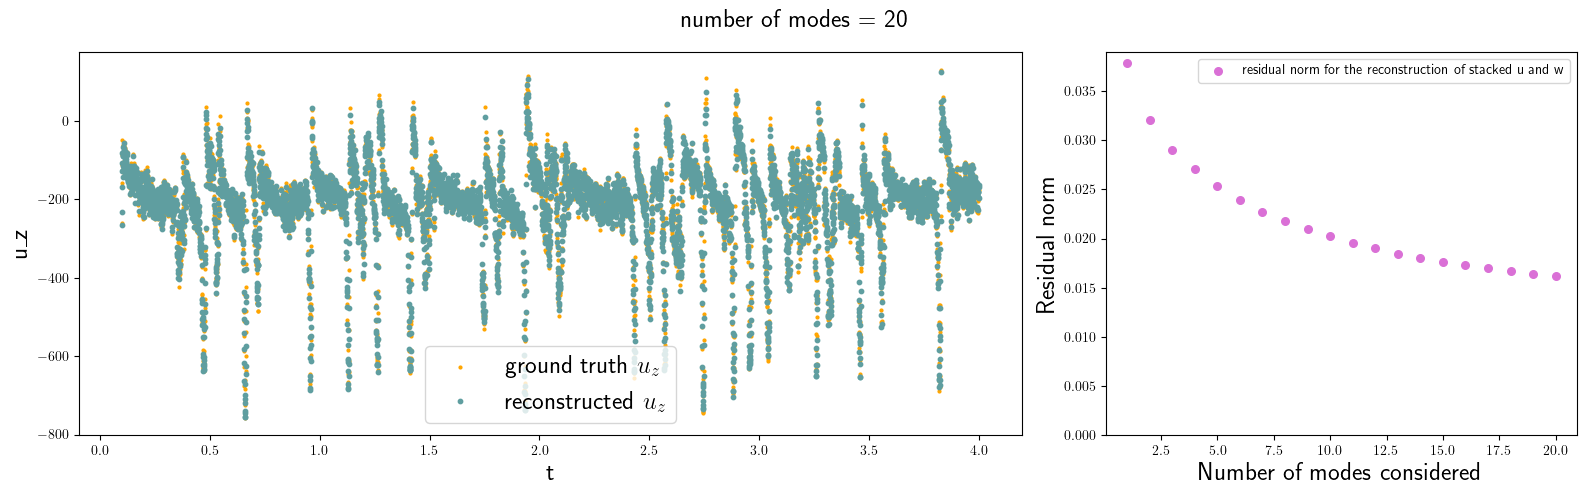

In [17]:
plot_uz(time, uz_reconstructed, uz, uzmean, num_modes, 20, residuals_uwt)
# plt.savefig(f'../results/POD/uz/uz_{num_modes}.png',dpi=300)

In [19]:
num_modes = 20
residuals_uw = np.zeros(num_modes)
for i in range(1, num_modes + 1 ):
    reconstructed_data = reconstruct_data(proj_coef_uw, modes_uw, i)
    r = residual_norm(UW, reconstructed_data)
    residuals_uw[i-1] = r
    U_reconstructed = np.reshape(reconstructed_data[:,:h*l], (m,h,l))
    W_reconstructed = np.reshape(reconstructed_data[:,h*l:], (m,h,l))
    reconstructed_simulation = Simulation(current_directory)
    reconstructed_simulation.reconstruct_simulation(U_reconstructed, W_reconstructed, T_reconstructed)
    uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()

    plot_uz(time, uz_reconstructed, uz, uzmean, i, num_modes, residuals_uwt)
    plt.savefig(f'../results/POD/uz/uz_{i}.png',dpi=300)
    plt.close()

In [ ]:
import imageio
import os
from natsort import natsorted

# Directory containing the images
image_directory = '../results/POD/uz/'

image_files = natsorted([os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')])
fps = 2
gif_path = '../results/POD/uz.gif'
with imageio.get_writer(gif_path, mode='I', fps = fps) as writer:
    for image_file in image_files:
        image = imageio.imread(image_file)
        writer.append_data(image)

print(f"GIF created at: {gif_path}")

/tmp/ipykernel_26709/4119110955.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_file)


GIF created at: ../results/POD/uz.gif


In [162]:
def make_gif(image_directory, gif_path, fps):

    image_files = natsorted([os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')])
    with imageio.get_writer(gif_path, mode='I', fps = fps) as writer:
        for image_file in image_files:
            image = imageio.imread(image_file)
            writer.append_data(image)

    print(f"GIF created at: {gif_path}")

In [158]:
make_gif('/home/julielimonet/Documents/Stage_M2/results/data_analysis/', '/home/julielimonet/Documents/Stage_M2/results/data_analysis/gt_flow.gif', 10)

/tmp/ipykernel_26709/118142840.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_file)


GIF created at: /home/julielimonet/Documents/Stage_M2/results/data_analysis/gt_flow.gif


In [ ]:
print(np.shape())

In [177]:
from POD import POD
num_modes = 20
modes_T, eigvals_T, eigvecs_T, proj_coef_T = POD(T, h, l, num_modes)

ValueError: shapes (51,6249,81) and (81,6249,51) not aligned: 81 (dim 2) != 6249 (dim 1)

In [170]:
reconstructed_simulation.save_clip(1350, 1400, '/home/julielimonet/Documents/Stage_M2/results/POD/')

In [171]:
make_gif('/home/julielimonet/Documents/Stage_M2/results/POD/', '/home/julielimonet/Documents/Stage_M2/results/data_analysis/reconstructed_flow.gif', 10)

/tmp/ipykernel_26709/118142840.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_file)


GIF created at: /home/julielimonet/Documents/Stage_M2/results/data_analysis/reconstructed_flow.gif


### On temperature

In [41]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

Tmean = np.mean(T, axis = 0)
h, l = np.shape(x)
m = len(time)
T = T - Tmean

T = np.reshape(T, (m, h*l))

In [42]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

num_modes = 100
modes_T, eigvals_T, eigvecs_T, proj_coef_T = POD(T, h, l, num_modes)

In [44]:
print(np.shape(modes_T))
modes = np.reshape(modes_T, (h,l,num_modes))

(4131, 100)


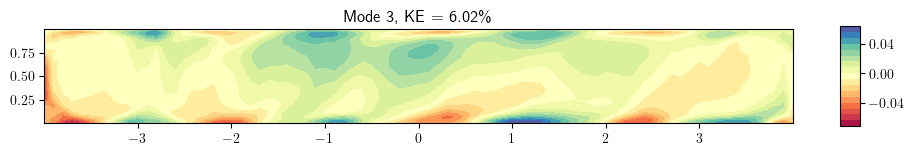

In [48]:
j = 3
# ticks = [0.04, 0, -0.04]
fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes[:,:,j], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13, ticks = ticks)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round(KE_modes_u[j]*100, 2)}\%')
plt.tight_layout()
# plt.savefig(f'../results/POD/pod_mode_w_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

# On pure RB

In [65]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/data_pureRB'

simulation_rb = Simulation(current_directory, Ra = 8, Lambda = 0)
time, x, z, u, w, T, umean, wmean = simulation_rb.import_data()

h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))

w = w - wmean
W = np.reshape(w, (m, h * l))

In [66]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

num_modes = 200
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W, h, l, num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)

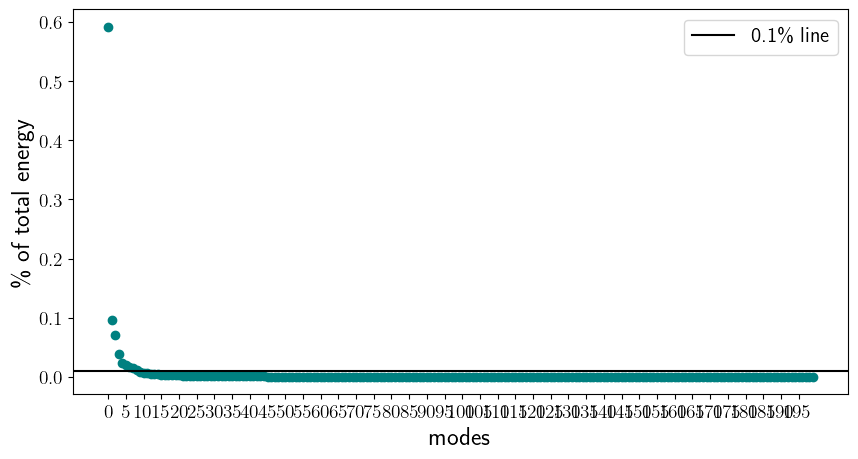

In [59]:
from POD import plot_energy_contribution
j = num_modes
plot_energy_contribution(KE_modes_all, j, fontsize)
plt.savefig('../results/pureRB/energy_contribution', dpi=300)

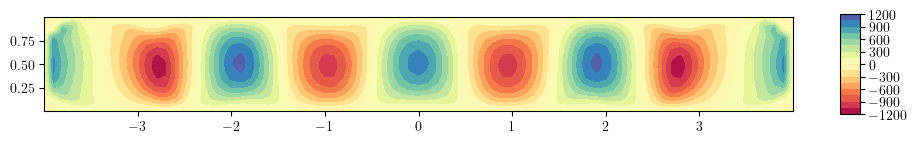

In [60]:
j = 0
# ticks = [0.04, 0, -0.04]
fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z,wmean, levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig(f'../results/pureRB/wmean.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [21]:
print(np.shape(modes_u))

modes_u = np.reshape(modes_u, (h,l,num_modes))
modes_w = np.reshape(modes_w, (h,l,num_modes))

(4131, 10)


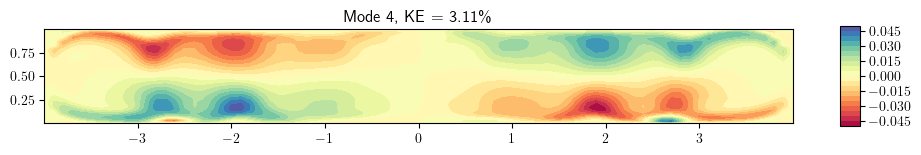

In [43]:
modes_u = np.reshape(modes_u, (h,l,num_modes))
modes_w = np.reshape(modes_w, (h,l,num_modes))
j = 4
# ticks = [0.04, 0, -0.04]
fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes_u[:,:,j], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round(KE_modes_u[j]*100, 2)}\%')
plt.tight_layout()
plt.savefig(f'../results/pureRB/pod_mode_u_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

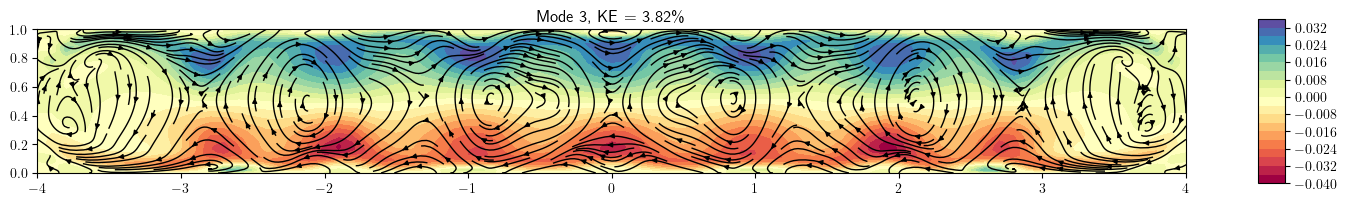

In [51]:
j= 3
fig, ax = plt.subplots(figsize = (15,5))



ax.streamplot(x.T, z.T, modes_u[:,:,j].T ,modes_w[:,:,j].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,j], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,j].min(), vmax=modes_u[:,:,j].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(f'Mode {j}, KE = {np.round(KE_modes_all[j]*100, 2)}\%')

plt.tight_layout()
plt.savefig(f'../results/pureRB/pod_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

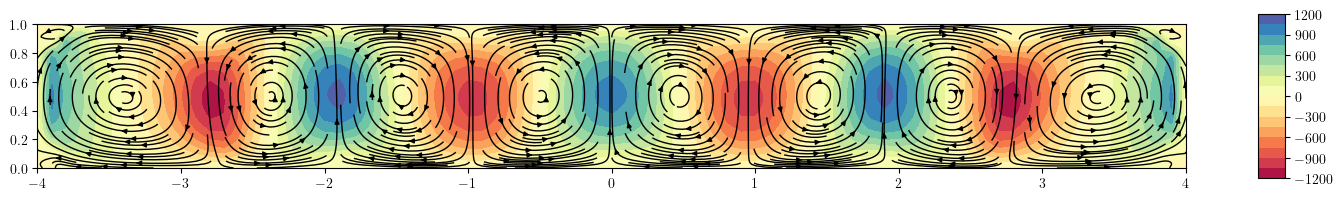

In [56]:
fig, ax = plt.subplots(figsize = (15,5))

ax.streamplot(x.T, z.T, umean.T ,wmean.T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, wmean, levels=20, cmap=cm.Spectral)
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
plt.tight_layout()
plt.savefig(f'../results/pureRB/quivermean.png',dpi=300, bbox_inches='tight')


plt.show()

In [67]:
from POD import residual_norm, reconstruct_data

num_modes = 200
residuals_RB = np.zeros(num_modes)
for i in range(1, num_modes + 1 ):
    reconstructed_data = reconstruct_data(proj_coef_u, modes_u, i, umean)
    r = residual_norm(U, reconstructed_data)
    residuals_RB[i-1] = r

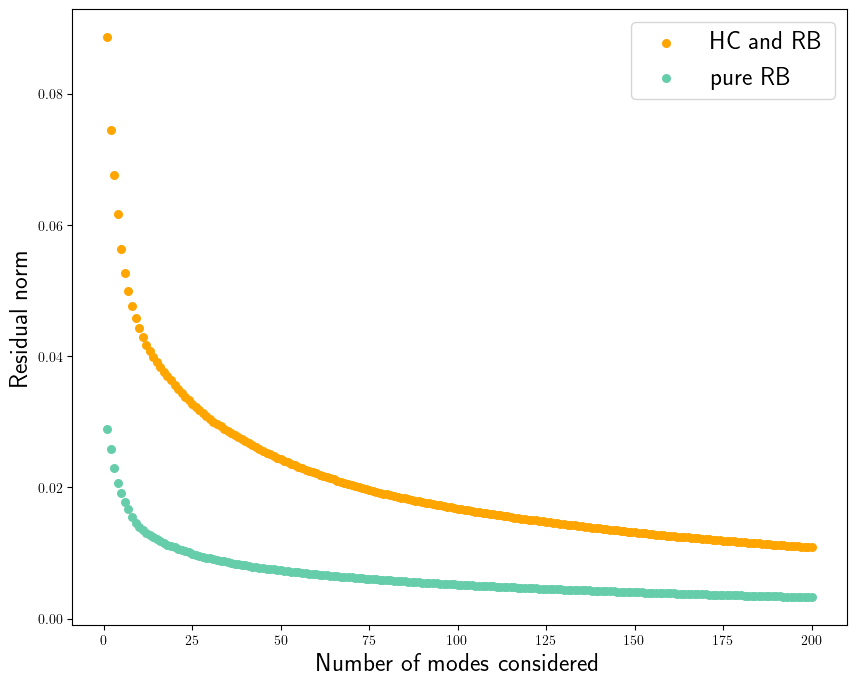

In [74]:
fig,ax = plt.subplots(figsize = (10, 8))

N_modes = np.arange(1, num_modes + 1, step = 1)

ax.scatter(N_modes, residuals, s = 30, c = 'orange', label = r'HC and RB')
ax.scatter(N_modes, residuals_RB, s = 30, c = 'mediumaquamarine', label= r"pure RB")

# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
ax.legend(fontsize = fontsize)
# fig.tight_layout()
plt.show()
# plt.savefig('../results/DMD/residual_norm.png',dpi=300)